# How to Define Grids

Numerical grids are of utmost importance for many scientific and technical applications. Consider them as discrete versions of regular coordinate systems for some domain. Accordingly, a `Grid` in *numgrids* is basically a collection of coordinate axes. For each axis, you can specify how the coordinate axis shall be discretized. Depending which type of discretization you choose, you gain access to powerful spectral methods, which allow you to work with coarse grid and have extremely high accuracy, nonetheless. All this is greatly facilitated by *numgrids*.

In this notebook, let's have a look how you can define grids. As mentioned, the basic entities are coordinate axes. Let's start with those before we continue and combine axes into grids.

In [2]:
from numgrids import *

## Defining Coordinate Axes

For each dimension in your grid, you define an axis. Let's start with the simplest (and least powerful) discretization type: the equidistant axis. To define it on the interval [0, 1] with 10 grid points, we say: 

In [3]:
axis = Axis.of_type(AxisType.EQUIDISTANT, 10, 0, 1)

If you are working in Jupyter, you can get a visualization of the axis by simply submitting the axis in a cell:

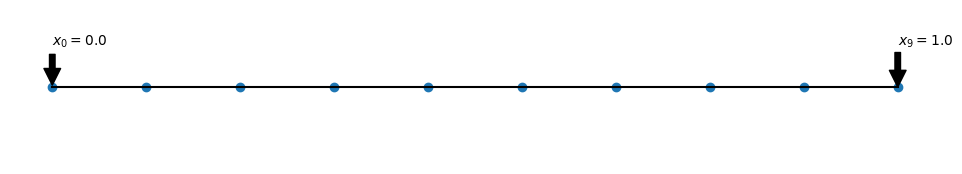

In [4]:
axis

Python in zero-based, so the first point in the axis is $x_0$ and the last of the ten points is $x_9$. You can get access to the coordinates of the points on the axis by the `coords` property:

In [5]:
axis.coords

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

To get a single point on the axis, you can use the shortcut

In [6]:
axis[0]

0.0

Note that this includes both specified endpoints like the default behavior of *numpy*'s `linspace` function. In fact, `axis.coords` is just an ordinary *numpy* array, so you can work with that as you are used to.

The equidistant axis that we have defined above, is non-periodic by default. This is a severe limitation for many applications because this means that you cannot use any modern spectral methods for this type of axis. To get the power of spectral methods, you have two choice: 

1. if your use case is periodic, use a periodic equidistant grid, or 
2. if your use case is non-periodic, use a non-equidistant Chebyshev grid, instead.

We will have a look at both types. Start with the periodic equidistant grid, let's say from 0 to 1 with 15 grid points:

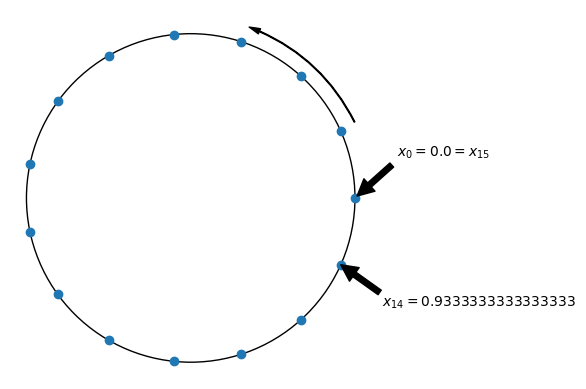

In [8]:
axis = Axis.of_type(AxisType.EQUIDISTANT_PERIODIC, 15, 0, 1)
axis

As you can see, the identification of x=0 with x=1 has effectively turned this axis into a circle. Note that the endpoint is not included, because it is redundant:

In [9]:
axis.coords

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333])

But we can still say:

In [10]:
axis[0]

0.0

In [11]:
axis[14]

0.9333333333333333

In [12]:
axis[15]

0.0

as should be expected.

If you have a non-periodic use case, use a Chebyshev axis, instead, to get access to spectral methods:

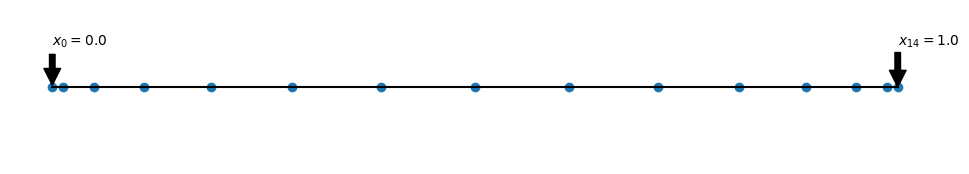

In [13]:
axis = Axis.of_type(AxisType.CHEBYSHEV, 15, 0, 1)
axis

As you can see, the grid points are more dense near the boundary and are almost equidistant in the center. This is the feature which opens the possibility to use spectral methods with amazing accuracy, even in the non-periodic case.

Finally, for some applications, you may want to use an axis with a logarithmic spacing. You can do this by writing

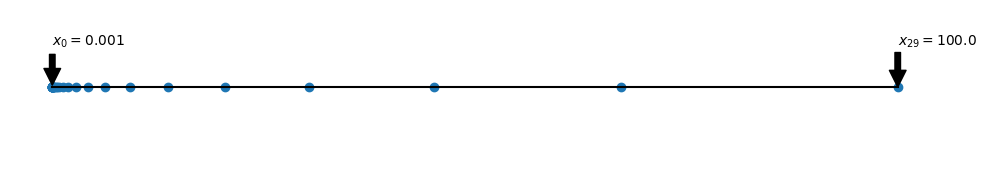

In [16]:
axis = Axis.of_type(AxisType.LOGARITHMIC, 30, 1.E-3, 100)
axis

Note, that like the equidistant non-periodic axis, the logarithmic axis is also not eligible for spectral methods, so that *numgrids* has to resort to more traditional methods to work with them.

## Assembling a Grid from Axes

Having defined one or more axes, you can easily assemble them to a grid. For example, let's say we have defined a Chebyshev axis,

In [17]:
axis = Axis.of_type(AxisType.CHEBYSHEV, 20, 0, 10)

A one-dimensional grid with this axis can be created by simply calling

In [19]:
grid_1d = Grid(axis)

A multidimensional grid can be created by simply throwing in more axes. For instance, in 3D we could write

In [21]:
grid_2d = Grid(axis, axis, axis)

Of course, you can pass different axes for each dimension, like

In [24]:
grid_2d = Grid(
    Axis.of_type(AxisType.CHEBYSHEV, 20, 0, 10),
    Axis.of_type(AxisType.EQUIDISTANT, 20, 0, 5)
)

You can mix axes of any type or size, if you want.

Grids in *numgrids* are of type `Grid`, which has some useful properties. For example, we can get the coordinates along all axes by calling

In [28]:
x, y = grid_2d.coords

In [29]:
x

array([ 0.        ,  0.06819348,  0.27091379,  0.60263124,  1.05429745,
        1.61359214,  2.26525921,  2.99152288,  3.77257256,  4.58710327,
        5.41289673,  6.22742744,  7.00847712,  7.73474079,  8.38640786,
        8.94570255,  9.39736876,  9.72908621,  9.93180652, 10.        ])

In [30]:
y

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

Note that these are the one-dimensional coordinate arrays for each defined axis. For a multidimensional grid, `grid.coords` returns a tuple of arrays. For a one-dimensional grid, it just returns the one coordinate array.

If you want to work on the grid, it is usually more comfortable to work with meshed coordinates:

In [32]:
X, Y = grid_2d.meshed_coords

In [33]:
X.shape

(20, 20)

In [34]:
Y.shape

(20, 20)

This allows you to evaluate functions of the grid, like

In [35]:
import numpy as np

f = np.sin(X) * np.cos(Y)

f.shape

With the meshed coordinates, we can also visualize the grid. We just need to flatten the arrays with *numpy*'s `reshape` function:

Text(0, 0.5, 'y')

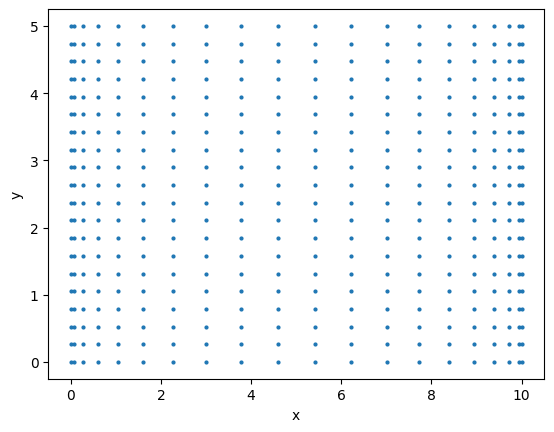

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(X.reshape(-1), Y.reshape(-1), "o", ms=2)
ax.set_xlabel("x")
ax.set_ylabel("y")

As you can see, we have Chebyshev spacing along the x-axis and equidistant spacing along the y-axis. Just as defined.